# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [58]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
test = (query_url + "portland")
print(test)



http://api.openweathermap.org/data/2.5/weather?appid=784d9b5b147e23542929e3e54b04db06&units=imperial&q=portland


## Generate Cities List

In [59]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#pprint(cities)
#len(lat_lngs)

636

In [60]:
city_info = pd.DataFrame({"city": cities})
city_info.head()

,city
0,cape town
1,mataura
2,port-gentil
3,nikolskoye
4,arraial do cabo


In [61]:
# set up additional columns to hold information

city_info['cloudiness'] = ""
city_info['lat'] = ""
city_info['long'] = ""
city_info['country'] = ""
city_info['date'] = ""
city_info['humidity'] = ""
city_info['max_temp'] = ""
city_info['wind_speed'] = ""

#city_info = city_info(dtype={'country': str,'cloudiness':int})

city_info.head()

,city,cloudiness,lat,long,country,date,humidity,max_temp,wind_speed
0,cape town,,,,,,,,
1,mataura,,,,,,,,
2,port-gentil,,,,,,,,
3,nikolskoye,,,,,,,,
4,arraial do cabo,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [62]:
print("Beginning Data Retrieval")
print("-----------------------------")
set=1
# Loop through the list of cities and perform a request for data on each
for index, row in city_info.iterrows():
    
    city_name = row['city']
    response1 = requests.get(query_url + city_name).json()
    #print(response1)
    try:
        #print(response1["coord"]["lat"])
        #print(index)

        city_info.loc[index, "lat"] = response1["coord"]["lat"]
        city_info.loc[index, "long"] = response1["coord"]["lon"]
        city_info.loc[index, "country"] = response1["sys"]["country"]
        city_info.loc[index, "date"] = response1["dt"]
        city_info.loc[index, "humidity"] = response1["main"]["humidity"]
        city_info.loc[index, "max_temp"] = response1["main"]["temp_max"]
        city_info.loc[index, "wind_speed"] = response1["wind"]["speed"]
        city_info.loc[index, "cloudiness"] = response1["clouds"]["all"]
        print(f"Processing Record {index} of Set {set} | {city_name}.")
        
    except (KeyError):
        print("City not found. Skipping...")
        set+= 1


Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | cape town.
Processing Record 1 of Set 1 | mataura.
Processing Record 2 of Set 1 | port-gentil.
Processing Record 3 of Set 1 | nikolskoye.
Processing Record 4 of Set 1 | arraial do cabo.
Processing Record 5 of Set 1 | vaini.
Processing Record 6 of Set 1 | shingu.
Processing Record 7 of Set 1 | ushuaia.
Processing Record 8 of Set 1 | hermanus.
Processing Record 9 of Set 1 | pisco.
Processing Record 10 of Set 1 | khatanga.
Processing Record 11 of Set 1 | upata.
Processing Record 12 of Set 1 | nishihara.
Processing Record 13 of Set 1 | tomatlan.
Processing Record 14 of Set 1 | maniitsoq.
Processing Record 15 of Set 1 | sao joao da barra.
Processing Record 16 of Set 1 | punta arenas.
Processing Record 17 of Set 1 | ponta do sol.
Processing Record 18 of Set 1 | sombrio.
Processing Record 19 of Set 1 | san cristobal.
Processing Record 20 of Set 1 | severnyy.
Processing Record 21 of Set 1 | balikpapan.
Proces

Processing Record 194 of Set 18 | bulalacao.
Processing Record 195 of Set 18 | thompson.
City not found. Skipping...
Processing Record 197 of Set 19 | roswell.
Processing Record 198 of Set 19 | boali.
Processing Record 199 of Set 19 | east london.
Processing Record 200 of Set 19 | price.
Processing Record 201 of Set 19 | boa vista.
Processing Record 202 of Set 19 | sabha.
Processing Record 203 of Set 19 | avarua.
Processing Record 204 of Set 19 | samarinda.
Processing Record 205 of Set 19 | olafsvik.
Processing Record 206 of Set 19 | huaihua.
Processing Record 207 of Set 19 | sorland.
Processing Record 208 of Set 19 | port elizabeth.
Processing Record 209 of Set 19 | sola.
Processing Record 210 of Set 19 | merauke.
Processing Record 211 of Set 19 | ariogala.
Processing Record 212 of Set 19 | port macquarie.
Processing Record 213 of Set 19 | shelburne.
Processing Record 214 of Set 19 | villazon.
City not found. Skipping...
Processing Record 216 of Set 20 | launceston.
Processing Record 

Processing Record 388 of Set 40 | lengshuijiang.
Processing Record 389 of Set 40 | naze.
Processing Record 390 of Set 40 | luwuk.
Processing Record 391 of Set 40 | guerrero negro.
Processing Record 392 of Set 40 | kaniama.
Processing Record 393 of Set 40 | general pico.
Processing Record 394 of Set 40 | rodrigues alves.
Processing Record 395 of Set 40 | san rafael.
Processing Record 396 of Set 40 | cam ranh.
Processing Record 397 of Set 40 | kasongo.
Processing Record 398 of Set 40 | mae hong son.
Processing Record 399 of Set 40 | samarai.
Processing Record 400 of Set 40 | adrar.
Processing Record 401 of Set 40 | mandal.
Processing Record 402 of Set 40 | san jeronimo.
Processing Record 403 of Set 40 | nantucket.
Processing Record 404 of Set 40 | havre-saint-pierre.
City not found. Skipping...
Processing Record 406 of Set 41 | talcahuano.
City not found. Skipping...
Processing Record 408 of Set 42 | obo.
Processing Record 409 of Set 42 | cukai.
Processing Record 410 of Set 42 | cervo.
P

Processing Record 577 of Set 54 | senador jose porfirio.
Processing Record 578 of Set 54 | athabasca.
Processing Record 579 of Set 54 | ilhabela.
Processing Record 580 of Set 54 | salinopolis.
Processing Record 581 of Set 54 | karmaskaly.
Processing Record 582 of Set 54 | kaitangata.
Processing Record 583 of Set 54 | san quintin.
Processing Record 584 of Set 54 | asau.
Processing Record 585 of Set 54 | bintulu.
Processing Record 586 of Set 54 | pontianak.
Processing Record 587 of Set 54 | bullhead city.
Processing Record 588 of Set 54 | zhicheng.
Processing Record 589 of Set 54 | pak thong chai.
Processing Record 590 of Set 54 | flin flon.
Processing Record 591 of Set 54 | sisimiut.
Processing Record 592 of Set 54 | sitka.
Processing Record 593 of Set 54 | magaria.
Processing Record 594 of Set 54 | itaituba.
Processing Record 595 of Set 54 | newton.
Processing Record 596 of Set 54 | sao felipe.
Processing Record 597 of Set 54 | ghanzi.
Processing Record 598 of Set 54 | balabac.
Process

In [80]:
#city_info.dropna()
#city_info.dropna(subset = ["cloudiness"], inplace=True)

city_info1 = city_info.replace('', np.nan)
city_info2 = city_info1.dropna()

#city_info3= city_info2.dropna(inplace=True)


#city_info.fillna(0)

#city_info[city_info["cloudiness"] != " "]

#df[df.name != 'Tina']

#df.drop(rows=['cloudiness','Height'])

In [81]:
city_info2.head()

,city,cloudiness,lat,long,country,date,humidity,max_temp,wind_speed
0,cape town,1.0,-33.93,18.42,ZA,1.586742e+09,87.0,55.00,3.36
1,mataura,99.0,-46.19,168.86,NZ,1.586742e+09,89.0,44.01,11.01
2,port-gentil,75.0,-0.72,8.78,GA,1.586743e+09,73.0,79.11,2.35
3,nikolskoye,75.0,59.70,30.79,RU,1.586742e+09,75.0,42.80,8.95
4,arraial do cabo,98.0,-22.97,-42.03,BR,1.586743e+09,65.0,73.49,6.24


In [75]:
city_info2.to_csv(output_data_file, encoding="utf-8", index=False)



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
city_info2.count()

city          582
cloudiness    582
lat           582
long          582
country       582
date          582
humidity      582
max_temp      582
wind_speed    582
dtype: int64

In [83]:
city_info2.dtypes

city           object
cloudiness    float64
lat           float64
long          float64
country        object
date          float64
humidity      float64
max_temp      float64
wind_speed    float64
dtype: object

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

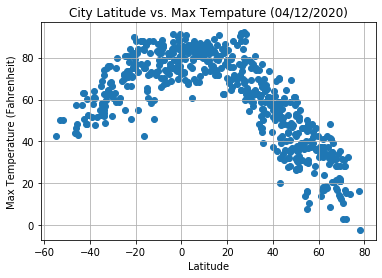

In [89]:
# Create a Scatter Plot for temperature vs. latitude


# Build a scatter plot for each data type
plt.scatter(city_info2["lat"], city_info2["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Tempature (04/12/2020)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVSTemperaturePlot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

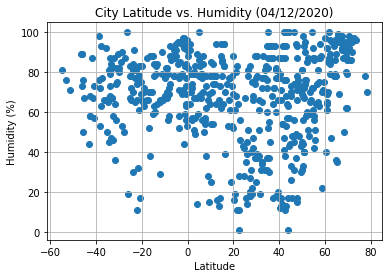

In [90]:
# Create a Scatter Plot for humidity vs. latitude


# Build a scatter plot for each data type
plt.scatter(city_info2["lat"], city_info2["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (04/12/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVSHumidityPlot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

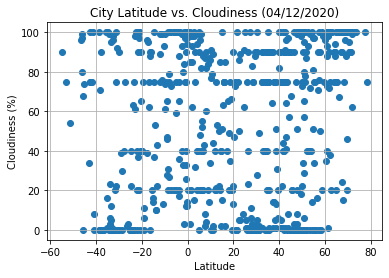

In [91]:
# Create a Scatter Plot for cloudiness vs. latitude


# Build a scatter plot for each data type
plt.scatter(city_info2["lat"], city_info2["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/12/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVScloudinessPlot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

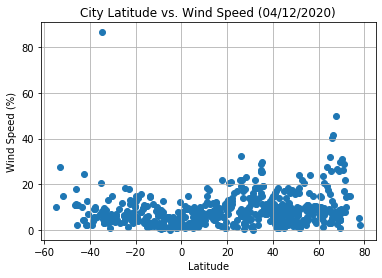

In [92]:
# Create a Scatter Plot for wind speed vs. latitude


# Build a scatter plot for each data type
plt.scatter(city_info2["lat"], city_info2["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/12/2020)")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVSWind_SpeedPlot.png")

# Show plot
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


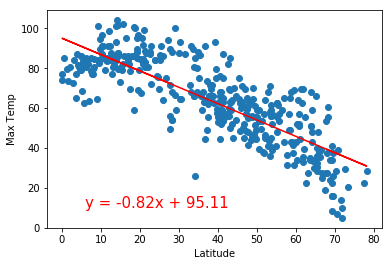

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


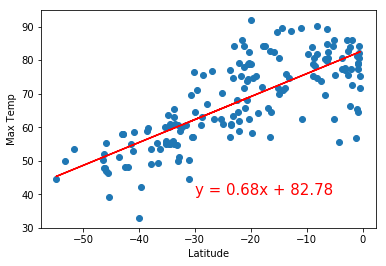

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


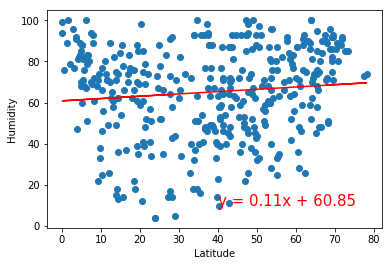

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


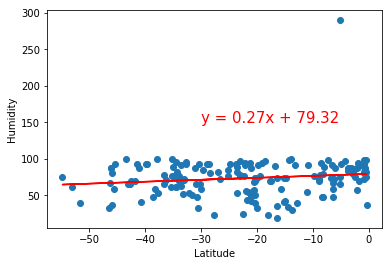

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


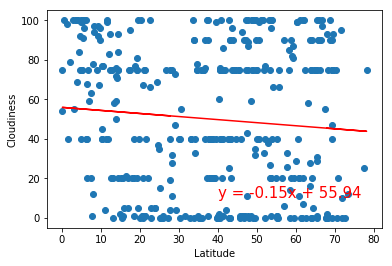

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


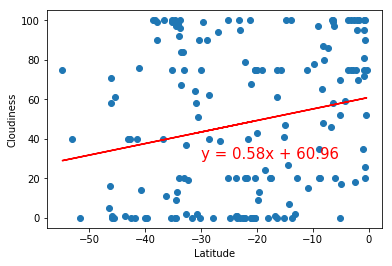

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


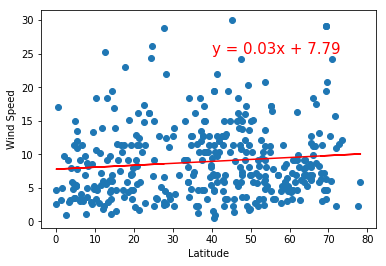

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


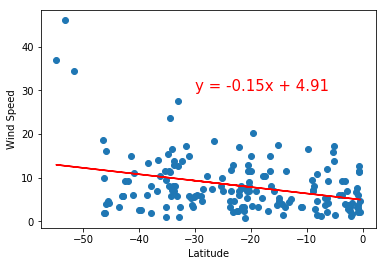